# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Step 1: Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")  

### Step 2: EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [3]:
df.set_index('id',inplace=True)

In [4]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
id,,,,,,,,,,
6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 6.2+ MB


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.155125,2.153603,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.235272,0.582054,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.067365,7.836556,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.265797,0.852149,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.710868,1.254142,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.782069,0.717394,0.0,4.317488,4.70953,5.220356,7.600402


### unique values for categorical variables

In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(1))
        print('\n')

ROOM_TYPE :  3
Entire home/apt    0.557418
Private room       0.413394
Shared room        0.029188
Name: room_type, dtype: float64


CANCELLATION_POLICY :  3
strict      0.438579
flexible    0.304212
moderate    0.257210
Name: cancellation_policy, dtype: float64


CLEANING_FEE :  2
True     0.73406
False    0.26594
Name: cleaning_fee, dtype: float64


INSTANT_BOOKABLE :  2
f    0.737542
t    0.262458
Name: instant_bookable, dtype: float64




### Converting Instant_bookable from 'f' and 't' to boolean

In [12]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [13]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [14]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
id,,,,,,,,,,,,
6901257,3.0,1.0,False,100.0,1.0,1.0,5.010635,0,0,0,1,1
6304928,7.0,1.0,True,93.0,3.0,3.0,5.129899,0,0,0,1,1
7919400,5.0,1.0,True,92.0,1.0,3.0,4.976734,0,0,1,0,1
13418779,4.0,1.0,False,NaN,2.0,2.0,6.620073,0,0,0,0,1
3808709,2.0,1.0,True,40.0,0.0,1.0,4.744932,0,0,1,0,1


In [15]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
instant_bookable                    0
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
dtype: int64

### Imputing missing values

In [16]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

accommodates                    0
bathrooms                       0
instant_bookable                0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
dtype: int64

In [17]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
id,,,,,,,,,,,,
6901257,3.0,1.0,False,100.000000,1.0,1.0,5.010635,0,0,0,1,1
6304928,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
7919400,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
13418779,4.0,1.0,False,94.067365,2.0,2.0,6.620073,0,0,0,0,1
3808709,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1


In [18]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069,0.413366,0.029186,0.257182,0.438531,0.734021
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394,0.492441,0.168329,0.437083,0.496211,0.441856
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.000000,0.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for duplicates

In [19]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 19998


In [20]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

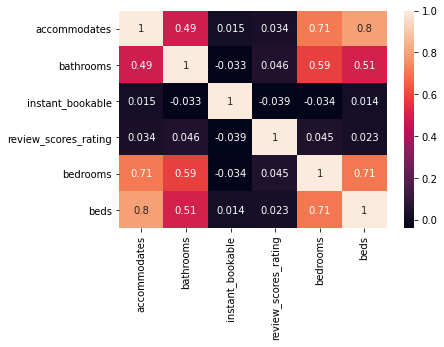

In [19]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


## Step 3: Data Cleaning

In [21]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
id,,,,,,,,,,,,
6901257,3.0,1.0,False,100.000000,1.0,1.0,5.010635,0,0,0,1,1
6304928,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
7919400,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
13418779,4.0,1.0,False,94.067365,2.0,2.0,6.620073,0,0,0,0,1
3808709,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54113 entries, 6901257 to 3534845
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   instant_bookable              54113 non-null  bool   
 3   review_scores_rating          54113 non-null  float64
 4   bedrooms                      54113 non-null  float64
 5   beds                          54113 non-null  float64
 6   log_price                     54113 non-null  float64
 7   room_type_Private room        54113 non-null  uint8  
 8   room_type_Shared room         54113 non-null  uint8  
 9   cancellation_policy_moderate  54113 non-null  uint8  
 10  cancellation_policy_strict    54113 non-null  uint8  
 11  cleaning_fee_True             54113 non-null  uint8  
dtypes: bool(1), float64(6), uint8(5)
memory usage: 3.2 M

### Outlier Checks

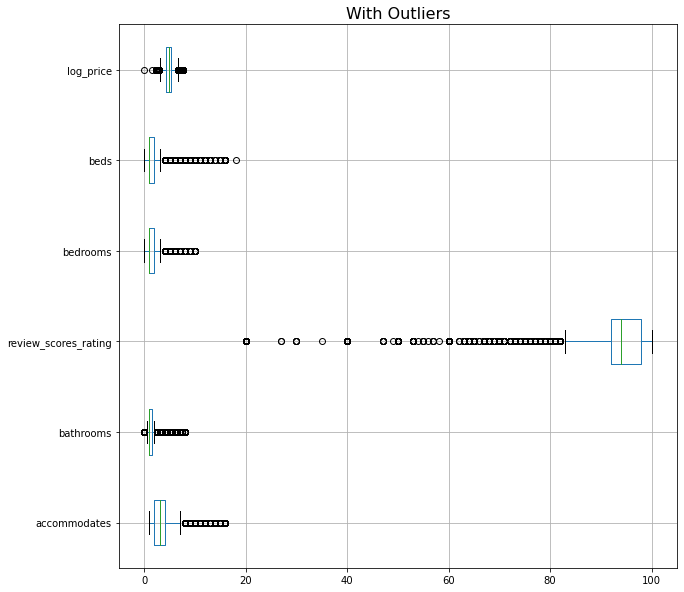

In [23]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

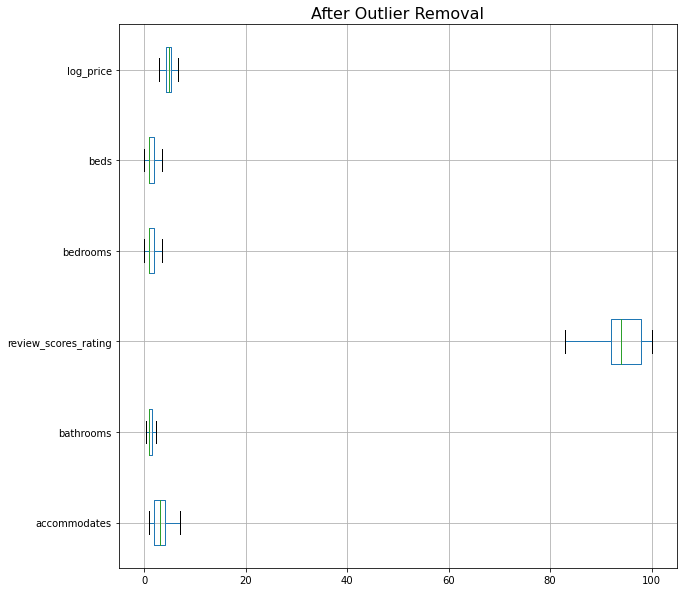

In [26]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

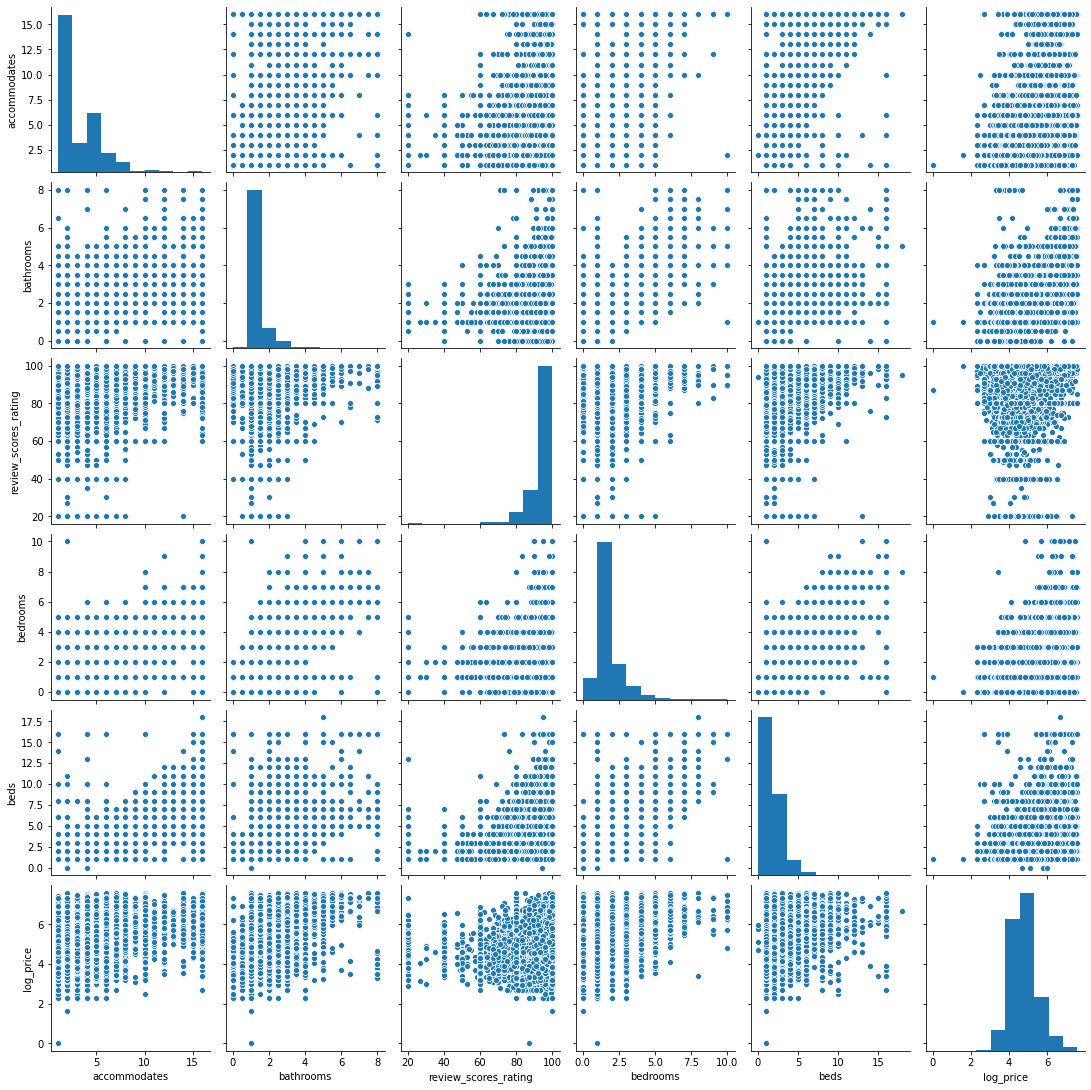

In [75]:
df_attr = (df[cont])
sns.pairplot(df_attr)  
plt.show()

### Step 4: Train-Test Split

In [27]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [28]:
X.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
id,,,,,,,,,,,
6901257,3.0,1.0,False,100.000000,1.0,1.0,0,0,0,1,1
6304928,7.0,1.0,True,93.000000,3.0,3.0,0,0,0,1,1
7919400,5.0,1.0,True,92.000000,1.0,3.0,0,0,1,0,1
13418779,4.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1
3808709,2.0,1.0,True,83.000000,0.0,1.0,0,0,1,0,1


In [29]:
y

,log_price
id,
6901257,5.010635
6304928,5.129899
7919400,4.976734
13418779,6.620073
3808709,4.744932
...,...
14934112,4.356709
13281809,5.043425
18688039,5.220356


In [30]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)  #80:20 / 75:25

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40584, 11)
(40584, 1)
(13529, 11)
(13529, 1)


### Step 5: Model Training : Linear Regression Model

In [32]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()  #build object
regression_model.fit(X_train, y_train)  #fit it on the data

predicted_train = regression_model.predict(X_train)  #predict
predicted_test = regression_model.predict(X_test)  

In [37]:
regression_model.coef_

array([[ 0.09505751,  0.18080417, -0.06503896,  0.01170187,  0.15805881,
        -0.04507899, -0.61155709, -1.08180489, -0.06001522, -0.00582287,
        -0.08187382]])

In [36]:
model_coefficients = pd.DataFrame(regression_model.coef_,columns=X_train.columns).T.rename({0:'LR_Coefficients'},axis=1).sort_values(by='LR_Coefficients', ascending=False)
model_coefficients

,LR_Coefficients
bathrooms,0.180804
bedrooms,0.158059
accommodates,0.095058
review_scores_rating,0.011702
cancellation_policy_strict,-0.005823
beds,-0.045079
cancellation_policy_moderate,-0.060015
instant_bookable,-0.065039
cleaning_fee_True,-0.081874
room_type_Private room,-0.611557


In [37]:
feature_coef = pd.DataFrame(regression_model.coef_, columns = X_train.columns).T.rename({0:'Feature Log_Coefficients'},axis=1)
feature_coef.sort_values(by='Feature Log_Coefficients', ascending=False)
feature_coef['Actual Coefficients(Exp)']   =np.exp(feature_coef['Feature Log_Coefficients'])
feature_coef

,Feature Log_Coefficients,Actual Coefficients(Exp)
accommodates,0.095058,1.099722
bathrooms,0.180804,1.198181
instant_bookable,-0.065039,0.937031
review_scores_rating,0.011702,1.011771
bedrooms,0.158059,1.171235
beds,-0.045079,0.955922
room_type_Private room,-0.611557,0.542505
room_type_Shared room,-1.081805,0.338983
cancellation_policy_moderate,-0.060015,0.941750
cancellation_policy_strict,-0.005823,0.994194


In [38]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))
print(np.exp(intercept))

The intercept for our model is 3.4292638017758423
30.853919785446035


In [39]:
# R square on training data
regression_model.score(X_train, y_train)

0.5082917563299905

50% of the variation in the log_price is explained by the predictors in the model for train set

In [50]:
# R square on testing data
regression_model.score(X_test, y_test)

0.5019765734338828

### Step 6: Model prediction

In [41]:
predicted_train = regression_model.predict(X_train)

### Step 7: Model Evaluation

In [40]:
#RMSE on Training data
rmse = mean_squared_error(y_train,predicted_train, squared=False)  #it will return Root mean squared error
rmse

0.5159255811569989

In [52]:
#rmse
np.sqrt(mean_squared_error(y_train,predicted_train))

0.5159255811569989

In [45]:
y_train.mean()

log_price    4.861508
dtype: float64

In [53]:
size_of_error = rmse / y_train.mean()
accuracy = 1-size_of_error
accuracy

log_price    0.893875
dtype: float64

### Linear Regression using statsmodels

In [41]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,log_price
id,,,,,,,,,,,,
9864083,3.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1,5.010635
3304473,5.0,2.0,False,92.000000,2.0,2.0,0,0,0,1,1,5.703782
17810176,4.0,1.0,False,100.000000,2.0,2.0,0,0,0,1,0,5.857933
7382085,2.0,1.5,True,94.067365,1.0,1.0,1,0,0,1,0,5.129899
1589770,4.0,1.0,False,84.000000,1.0,2.0,0,0,0,1,1,4.564348


In [42]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [43]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_private_room', 'room_type_shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [44]:
#ensure there is no spaces between col name   y=f(x)
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+ review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [45]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       3.429264
instant_bookable[T.True]       -0.065039
accommodates                    0.095058
bathrooms                       0.180804
review_scores_rating            0.011702
bedrooms                        0.158059
beds                           -0.045079
room_type_private_room         -0.611557
room_type_shared_room          -1.081805
cancellation_policy_moderate   -0.060015
cancellation_policy_strict     -0.005823
cleaning_fee_True              -0.081874
dtype: float64

In [59]:
#inversing the coeffs to real value
for i in lm1.params:
    print(np.exp(i))

30.853919785446813
0.937030951897154
1.0997220932412375
1.1981805149935134
1.0117706041199555
1.1712350781283727
0.9559219659766677
0.5425054818375514
0.33898314615512387
0.9417501987220621
0.9941940494260609
0.921388214290974


In [46]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:24:46   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [60]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

In [61]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.5159255811569985

In [45]:
np.sqrt(lm1.mse_resid) #another way

0.5160018732951102

In [46]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

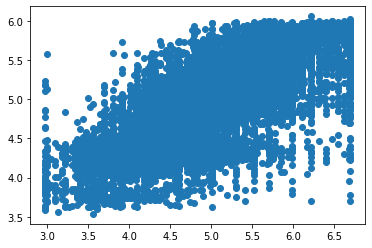

In [47]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [48]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True + 

 # Conclusion

The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.43) + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant 
,When no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant
,etcc....

 
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant. etc..



#  Insights

1) There is a Decrement in Price of the property by a larger factor if the rooms are Shared rather than Private .

2) There is a Decrement in Price of the property by a larger factor if the property has a Strict Cancellation Policy 
   rather than a Moderate Cancellation Policy.
   
3) More the number of bedrooms/bathrooms the price of the property goes up a little 

4) while More the number of beds the price of the property goes down a little . 
